# TUGAS PRAKTIKUM 9 METODE NUMERIK
__Optimization__

```Nama: Antonius Aditya Rizky Wijaya```

```NIM: G5402221003```

<hr style="border:2px solid black"> </hr>

### __Soal 1__
Fungsi $$f(x) = x^2 - 2x + 2$$ memiliki nilai minimum di $x^*=1$

__(a)__ Gunakan metode _golden section_ untuk mencari minimum dari fungsi $f$ dengan menggunakan beberapa nilai toleransi (minimal 3). Apakah titik minimum $x$ yang diperoleh sama dengan $x^*$? Apakah hasil evaluasi fungsi $f(x)$ sama dengan $f(x^*)$? Jelaskan!

__(b)__ Gunakan metode Newton untuk menjawab pertanyaan yang sama pada poin a!

#### 1a) Menggunakan metode _golden section_

In [316]:
function goldensection(f,a,b,tol)
    τ = (sqrt(5)-1)/2
    x1 = a+(1-τ)*(b-a);f1=f(x1)
    x2 = a+τ*(b-a);f2=f(x2)
    M = [x1 f1 x2 f2]
    iter = 1
    while b-a > tol && iter<1000
        if f1 > f2
            a=x1
            x1=x2;f1=f2
            x2=a+τ*(b-a);f2=f(x2)
        else
            b=x2
            x2=x1;f2=f1
            x1=a+(1-τ)*(b-a);f1=f(x1)
        end
        M = [M; x1 f1 x2 f2]
        iter += 1
    end
    return x1,M
end;

In [317]:
f(x) = x^2 - 2*x + 2
min_x, M1 = goldensection(f,0,2,1e-7)
println("\e[1mToleransi 10^-7\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-7
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0000000000000009
Nilai x yang menghasilkan nilai minimum : 0.9999999700466811



In [318]:
f(x) = x^2 - 2*x + 2
min_x, M2 = goldensection(f,0,2,1e-10)
println("\e[1mToleransi 10^-10\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-10
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0
Nilai x yang menghasilkan nilai minimum : 0.999999987111188



In [319]:
f(x) = x^2 - 2*x + 2
min_x, M3 = goldensection(f,0,2,1e-12)
println("\e[1mToleransi 10^-12\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-12
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0
Nilai x yang menghasilkan nilai minimum : 0.999999987095347



__Penjelasan :__

Dengan metode _golden section,_ titik minimum $x$ yang diperoleh sedikit berbeda dengan $x^* = 1$. Nilai minimum $x$ yang diperoleh sekitar $0.999$ baik untuk toleransi $10^{-7}$, $10^{-10}$, maupun $10^{-12}$. Sementara untuk hasil evaluasi fungsi $f(x)$ sama dengan $f(x^*)$, yaitu $1$. Nilai minimum yang berbeda dengan solusi eksak ini bisa disebabkan karena metode _golden section_ tidak menggunakan informasi tentang turunan fungsi dan hanya memanfaatkan nilai-nilai fungsi untuk mencari nilai minimum. Ini bisa menghasilkan solusi yang kurang akurat karena algoritma hanya dapat menyesuaikan solusi berdasarkan perbandingan relatif antara nilai-nilai fungsi, tanpa memperhitungkan kemiringan atau bentuk lengkung fungsi.

#### 1b) Menggunakan metode Newton

In [320]:
function newton(f, df, ddf, x0, tol)
    x1 = x0 - df(x0)/ddf(x0)
    M = [x0 f(x0);x1 f(x1)]
    iter = 1
    while abs(x1-x0)>tol && iter<1000
        x0 = x1
        x1 = x0 - df(x0)/ddf(x0)
        M = [M; x1 f(x1)]
        iter += 1
    end
    return x1,M
end;

In [321]:
f(x) =  x^2 - 2*x + 2;
df(x) = 2*x - 2;
ddf(x) = 2;

In [322]:
min_x, M1 = newton(f,df,ddf,1,1e-7)
println("\e[1mToleransi 10^-7\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-7
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0
Nilai x yang menghasilkan nilai minimum : 1.0



In [323]:
min_x, M2 = newton(f,df,ddf,1,1e-10)
println("\e[1mToleransi 10^-10\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-10
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0
Nilai x yang menghasilkan nilai minimum : 1.0



In [324]:
min_x, M3 = newton(f,df,ddf,1,1e-12)
println("\e[1mToleransi 10^-12\e[0m")
println("Nilai minimum dari f(x) = x^2 - 2*x + 2 : ", f(min_x))
println("Nilai x yang menghasilkan nilai minimum : ", min_x, "\n")

Toleransi 10^-12
Nilai minimum dari f(x) = x^2 - 2*x + 2 : 1.0
Nilai x yang menghasilkan nilai minimum : 1.0



__Penjelasan :__

Dengan metode _newton,_ titik minimum $x$ yang diperoleh sama dengan $x^*$, yaitu $x= 1$ baik untuk toleransi $10^{-7}$, $10^{-10}$, maupun $10^{-12}$. Sementara untuk hasil evaluasi fungsi $f(x)$ sama dengan $f(x^*)$, yaitu $1$. Solusi yang diperoleh menggunakan _metode newton_ sering kali lebih akurat daripada metode _golden section_ karena _metode newton_ menggunakan informasi tentang turunan fungsi (gradien) untuk mencari nilai minimun dengan lebih efisien. Namun, metode _newton_ membutuhkan turunan fungsi sampai turunan kedua, sehingga metode _golden section_ akan lebih menguntungkan untuk mencari nilai minimum fungsi yang turunannya sulit didapat.

<hr style="border:2px solid black"> </hr>

### __Soal 2__
Diberikan suatu fungsi $f : ℝ^2 → ℝ$  yang didefinisikan oleh $$f(x,y) = 2x^3 - 3x^2 - 6xy(x-y-1)$$

__(a)__ Tentukan semua titik kritis dari $f$ secara analitik (yaitu tanpa menggunakan komputer)

__(b)__ Tentukan jenis setiap titik kritis (minimum/maksimum/sadel) secara analitik

__(c)__ Periksa analisis poin a. dan b. dengan membentuk suatu _contour plot_ ataupun surface 3-dimensi dari fungsi $f$ pada daerah $−2 ≤ x ≤ 2$, $−2 ≤ y ≤ 2$

__(d)__ Gunakan metode optimasi untuk mencari nilai minimum dari fungsi $f$ dan $−f$ . Cobalah mencari solusi menggunakan berbagai nilai awal (_starting point_) minimal 3 nilai awal. Gambarkan jalur perambatan solusi tiap percobaan yang telah dilakukan. Apa yang dapat disimpulkan?

#### 2a)
$f(x,y) = 2x^3 - 3x^2 - 6xy(x-y-1)$

- Turunan parsial dari fungsi tersebut :

> $f_x(x,y) = 6x^2 - 6x - 12xy + 6y^2 + 6y$ $... (1)$
> 
> $f_y(x,y) = -6x^2 + 12xy +6x$ $... (2)$

- Turunan parsial kedua :

> $f_{xx}(x,y) = 12x - 6 - 12y$
> 
> $f_{xy}(x,y) = -12x + 12y + 6$
> 
> $f_{yx}(x,y) = -12x + 12y + 6$
> 
> $f_{yy}(x,y) = 12x$

- Titik stationer : $f_x(x,y) = 0$ , $f_y(x,y) = 0$

> Dari persamaan $(2)$ :
> 
> $-6x^2 + 12xy + 6x = 0$
> 
> $-6x(x-2y-1) = 0$
>
> $x = 0$ , $y = \frac{x-1}{2}$

- Untuk $x =0$, substitusi ke persamaan $(1)$ :
> $6x^2 - 6x - 12xy + 6y^2 + 6y = 0$
> 
> $6y^2 + 6y = 0$
>
> $y = -1$ , $y = 0$
>
> - Titik kritis : $(0,-1), (0,0)$

- Untuk $y = \frac{x-1}{2}$, substitusi ke persamaan $(1)$ :
> $6x^2 - 6x - 12xy + 6y^2 + 6y = 0$
> 
> $6x^2 - 6x - 12x(\frac{x-1}{2}) + 6(\frac{x-1}{2})^2 + 6(\frac{x-1}{2}) = 0$
> 
> $x^2 - x - x(x-1) + (\frac{x-1}{2})^2 + (\frac{x-1}{2}) = 0$
>
> $\frac{(x-1)^2}{4} + (\frac{x-1}{2}) = 0$
>
> $\frac{x^2 - 2x + 1}{4} + (\frac{x-1}{2}) = 0$
>
> $x^2 - 2x + 1 + 2(x-1) = 0$
>
> $x^2 - 1 = 0$
>
> $x = -1$ , $x = 1$ ==> substitusi ke $y = \frac{x-1}{2}$, sehingga $y = -1$ , $y = 0$
>
> - Titik kritis : $(-1,-1), (1,0)$

- Sehingga didapat 4 titik kritis, yaitu : $(0,-1), (0,0), (-1,-1), (1,0)$

#### 2b)

$$D = \begin{equation}
\left|\begin{matrix}
  12x - 6 - 12y &  -12x + 12y + 6 \\
  -12x + 12y + 6 &  12x \\
\end{matrix}\right|
\end{equation}$$
$$ D = 12x(12x - 6 - 12y) - (-12x + 12y + 6)^2 $$

- $D(0,-1) = -36 < 0$, sehingga $(0,-1)$ adalah titik sadel
- $D(0, 0) = -36 < 0$, sehingga $(0, 0)$ adalah titik sadel
- $D(-1,-1) = 36 > 0$ dan $f_{xx}(-1,-1) = -6 < 0$, sehingga $(-1, -1)$ adalah maksimum lokal
- $D(1, 0) = 36 > 0$ dan $f_{xx}(1, 0) = 6 > 0$, sehingga $(1, 0)$ adalah minimum lokal

#### 2c)

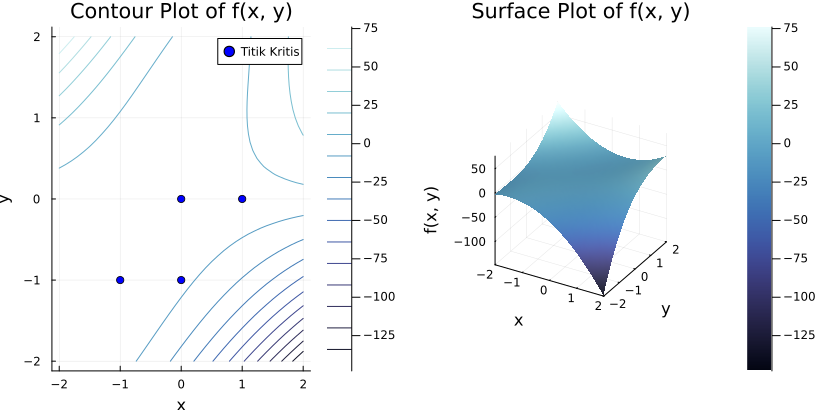

In [325]:
using Plots
f(x, y) = 2x^3 - 3x^2 - 6x*y*(x - y - 1)
daerah_x = -2:0.1:2
daerah_y = -2:0.1:2
titik_kritis = [(0, 0), (0, -1), (1, 0), (-1, -1)]
z = [f(x, y) for x in daerah_x, y in daerah_y]

contour_plot = contour(daerah_x, daerah_y, z, xlabel="x", ylabel="y", title="Contour Plot of f(x, y)", color=:ice)
surface_plot = surface(daerah_x, daerah_y, z, xlabel="x", ylabel="y", zlabel="f(x, y)", title="Surface Plot of f(x, y)", color=:ice)
plot(contour_plot, surface_plot, layout=(1,2), size=(825, 410))
scatter!([t[1] for t in titik_kritis], [t[2] for t in titik_kritis], label="Titik Kritis", markersize=4, color=:blue, legend=:topright)

#### 2d) Menggunakan metode _Quasi-Newton (BFGS)_

In [326]:
using LinearAlgebra
function BFGS(f, g, x0; tol=1e-8)
    B0 = I(length(x0)) # initial Hessian approximation
    s = - B0\g(x0)
    x1 = x0 + s
    y = g(x1)-g(x0)
    B1 = B0 + (y*y')/(y'*s) - (B0*s*s'*B0)/(s'*B0*s)
    M = [x0' f(x0); x1' f(x1)]
    iter = 1
    while norm(x1-x0)>tol && iter<1000
        x0 = x1
        B0 = B1
        s = - B0\g(x0)
        x1 = x0 + s
        y = g(x1)-g(x0)
        B1 = B0 + (y*y')/(y'*s) - (B0*s*s'*B0)/(s'*B0*s)
        M = [M; x1' f(x1)]
        iter += 1
    end
    return x1, M
end;

In [327]:
f(x) = 2*x[1]^3 - 3*x[1]^2 - 6*x[1]^2*x[2] + 6*x[1]*x[2]^2 + 6x[1]*x[2];
g(x) = [6*x[1]^2 - 6*x[1] - 12*x[1]*x[2] + 6*x[2]^2 + 6*x[2] ; -6x[1]^2 + 12*x[1]*x[2] + 6*x[1]];

Nilai awal : [2, 3]
Solusi yang meminimumkan fungsi f : [1.0000000000004075, 4.6336655629448e-13]
Solusi yang meminimumkan fungsi -f : [-1.0000000000027598, -1.000000000001377]



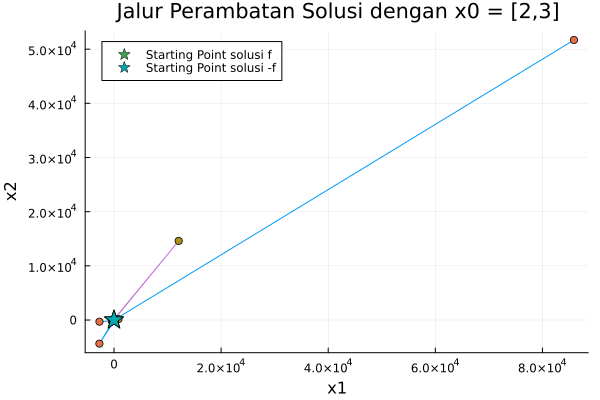

In [328]:
x0 = [2,3];
min_f, M = BFGS(f, g, x0)
min_neg_f, M_neg = BFGS(x -> -f(x[1], x[2]), x -> -g(x), x0)
println("Nilai awal : ", x0)
println("Solusi yang meminimumkan fungsi f : ", min_f)
println("Solusi yang meminimumkan fungsi -f : ", min_neg_f, "\n")

using Plots
plot(M[:,1], M[:,2], label=:none)
scatter!(M[:,1], M[:,2], label=:none, xlabel="x1", ylabel="x2", title="Jalur Perambatan Solusi dengan x0 = [2,3]")
scatter!([M[1,1]],[M[1,2]],m=:star,ms=10,label="Starting Point solusi f",legend=:topleft)

plot!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!([M_neg[1,1]],[M_neg[1,2]],m=:star,ms=10,label="Starting Point solusi -f",legend=:topleft)

Nilai awal : [-2, -1]
Solusi yang meminimumkan fungsi f : [1.0000000000224236, -2.2874560761772123e-12]
Solusi yang meminimumkan fungsi -f : [-0.9999999999999268, -1.0000000000000748]



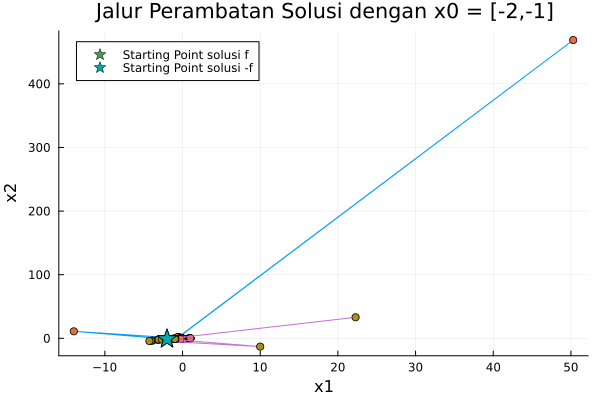

In [329]:
x0 = [-2,-1];
min_f, M = BFGS(f, g, x0)
min_neg_f, M_neg = BFGS(x -> -f(x[1], x[2]), x -> -g(x), x0)
println("Nilai awal : ", x0)
println("Solusi yang meminimumkan fungsi f : ", min_f)
println("Solusi yang meminimumkan fungsi -f : ", min_neg_f, "\n")

using Plots
plot(M[:,1], M[:,2], label=:none)
scatter!(M[:,1], M[:,2], label=:none, xlabel="x1", ylabel="x2", title="Jalur Perambatan Solusi dengan x0 = [-2,-1]")
scatter!([M[1,1]],[M[1,2]],m=:star,ms=10,label="Starting Point solusi f",legend=:topleft)

plot!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!([M_neg[1,1]],[M_neg[1,2]],m=:star,ms=10,label="Starting Point solusi -f",legend=:topleft)

Nilai awal : [0, -1]
Solusi yang meminimumkan fungsi f : [0.0, -1.0]
Solusi yang meminimumkan fungsi -f : [0.0, -1.0]



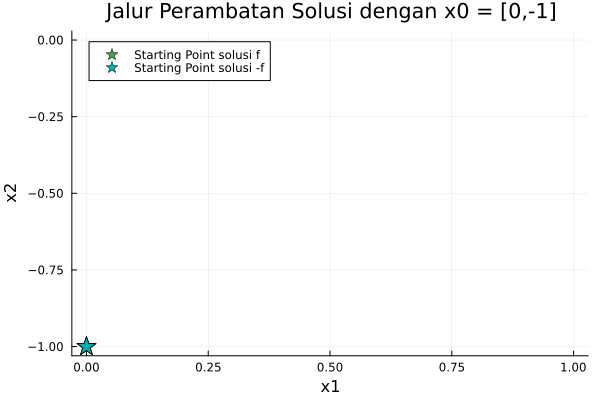

In [330]:
x0 = [0,-1];
min_f, M = BFGS(f, g, x0)
min_neg_f, M_neg = BFGS(x -> -f(x[1], x[2]), x -> -g(x), x0)
println("Nilai awal : ", x0)
println("Solusi yang meminimumkan fungsi f : ", min_f)
println("Solusi yang meminimumkan fungsi -f : ", min_neg_f, "\n")

using Plots
plot(M[:,1], M[:,2], label=:none)
scatter!(M[:,1], M[:,2], label=:none, xlabel="x1", ylabel="x2", title="Jalur Perambatan Solusi dengan x0 = [0,-1]")
scatter!([M[1,1]],[M[1,2]],m=:star,ms=10,label="Starting Point solusi f",legend=:topleft)

plot!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!([M_neg[1,1]],[M_neg[1,2]],m=:star,ms=10,label="Starting Point solusi -f",legend=:topleft)

Nilai awal : [0, 0]
Solusi yang meminimumkan fungsi f : [0.0, 0.0]
Solusi yang meminimumkan fungsi -f : [0.0, 0.0]



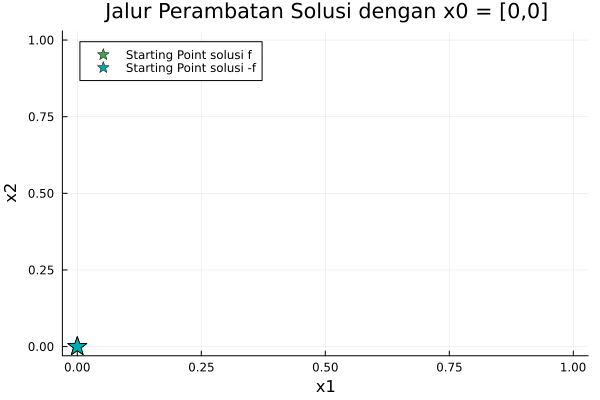

In [331]:
x0 = [0,0];
min_f, M = BFGS(f, g, x0)
min_neg_f, M_neg = BFGS(x -> -f(x[1], x[2]), x -> -g(x), x0)
println("Nilai awal : ", x0)
println("Solusi yang meminimumkan fungsi f : ", min_f)
println("Solusi yang meminimumkan fungsi -f : ", min_neg_f, "\n")

using Plots
plot(M[:,1], M[:,2], label=:none)
scatter!(M[:,1], M[:,2], label=:none, xlabel="x1", ylabel="x2", title="Jalur Perambatan Solusi dengan x0 = [0,0]")
scatter!([M[1,1]],[M[1,2]],m=:star,ms=10,label="Starting Point solusi f",legend=:topleft)

plot!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!(M_neg[:,1], M_neg[:,2], label=:none)
scatter!([M_neg[1,1]],[M_neg[1,2]],m=:star,ms=10,label="Starting Point solusi -f",legend=:topleft)

#### Kesimpulan 2d :
Dari hasil yang didapat, bisa disimpulkan bahwa meminimumkan nilai negatif dari suatu fungsi, akan menghasilkan solusi yang memaksimumkan fungsi tersebut, begitupun sebaliknya. Hal ini bisa dilihat dari percobaan dengan nilai awal $[2,3]$ dan $[-2,-1]$, dimana solusi yang meminimumkan $-f$ adalah $[-1,-1]$. Solusi tersebut adalah solusi yang memaksimumkan $f$ (bisa dilihat pada jawaban soal 2b). Sementara itu, jika menggunakan nilai awal yang berupa titik sadel, dalam kasus ini $(0,-1)$ dan $(0,0)$, maka meminimumkan $f$ dan $-f$ akan menghasilkan solusi yang sama.

<hr style="border:2px solid black"> </hr>

### __Soal 3__
When a shotputter projects a shot from height $h$ above the ground, at a speed $v$, its range $R$ is given by the equation
$$R = \frac{v^2cosα}{g}\left(sinα+\sqrt{sin^2α+\frac{2gh}{v^2}}\right),$$
where $α$ is the angle of projection with the horizontal. Find the angle $α$ that maximizes $R$ given $v = 13.7 m/s$, $h = 2.25 m$, and $g = 9.8 m/s^2$

#### Menggunakan metode _golden section_

In [332]:
function jangkauan(α, v, hi, gr)
    return (v^2 * cos(α) / gr) * (sin(α) + sqrt(sin(α)^2 + 2*gr*hi / v^2))
end;
v = 13.7
hi = 2.25
gr = 9.8

f(α) = -jangkauan(α, v, hi, gr)
α_maks, M = goldensection(f, 0, π/2, 1e-7)
R_maks = -f(α_maks)

println("Sudut α yang memaksimumkan R: ", rad2deg(α_maks), " derajat")
println("Jangkauan maksimum (R): ", R_maks)

Sudut α yang memaksimumkan R: 41.98266727100387 derajat
Jangkauan maksimum (R): 21.28344077219909


<hr style="border:2px solid black"> </hr>